In [3]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [4]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [6]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
target_users = ["@CNN","@BBC", "@FoxNews","@CBSTweet","@nytimes"]

# Intialize empty list for desired values
all_user_list = []
all_timestamp_list = []
all_text_list = []
all_tweets_ago_list = []
all_sentiments = []
all_compound_list = []
all_positive_list = []
all_negative_list = []
all_neutral_list = []

# Run loop for targets
for target_user in target_users:
    
    user_list = []
    timestamp_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    text_list = []
    tweets_ago_list = []
    tweet_count = 0
    
    for x in range(5):
        
        public_tweets = api.user_timeline(target_user, page = x)
        
        for tweet in public_tweets:
                timestamp = tweet['created_at']
                
                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                user_list.append(tweet['user']['screen_name'])
                timestamp_list.append(timestamp)
                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                text_list.append(tweet['text'])
                tweet_count += 1
                tweets_ago_list.append(tweet_count)
         
        # Append indvidual target list to each other
        all_user_list.append(user_list)
        all_timestamp_list.append(timestamp_list)
        all_compound_list.append(compound_list)
        all_negative_list.append(negative_list)
        all_positive_list.append(positive_list)
        all_neutral_list.append(neutral_list)
        all_text_list.append(text_list)
        all_tweets_ago_list.append(tweets_ago_list)

    
    
    # Set sentiments for next graph and append Sentiments
    sentiments = np.mean(compound_list)
    all_sentiments.append(sentiments)
    

In [8]:
# Flatten all lists to import into DF
all_user_list = np.array(all_user_list).flatten().tolist()
all_timestamp_list = np.array(all_timestamp_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_positive_list = np.array(all_positive_list).flatten().tolist()
all_neutral_list = np.array(all_neutral_list).flatten().tolist()
all_negative_list = np.array(all_negative_list).flatten().tolist()
all_text_list = np.array(all_text_list).flatten().tolist()
all_tweets_ago_list = np.array(all_tweets_ago_list).flatten().tolist()

In [9]:
# Create a DataFrame using results lists and display
news_df = {
            'User':all_user_list,
            'Timestamp':all_timestamp_list,
            'Compound':all_compound_list,
            'Positive':all_positive_list,
            'Negative':all_negative_list,
            'Neutral':all_neutral_list,
            'Tweets Ago':all_tweets_ago_list,
            'Tweet Text':all_text_list
}

news_df = pd.DataFrame(news_df)
news_df.shape

(2500, 8)

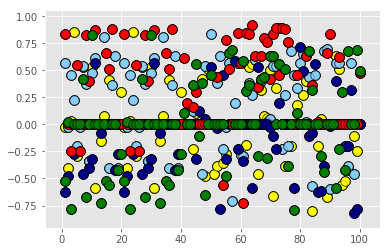

In [10]:
users = news_df['User'].unique()
colors = ['yellow', 'lightskyblue','darkblue','red','green']

for i in range(len(users)):
    plt.scatter(x = news_df[news_df['User'] == users[i]]['Tweets Ago'].values,
                y = news_df[news_df['User'] == users[i]]['Compound'].values,
                s = 90,
                c = colors[i], 
                label = users[i],
                alpha = 0.7, 
                edgecolor = 'black',
                linewidth = 0.8)

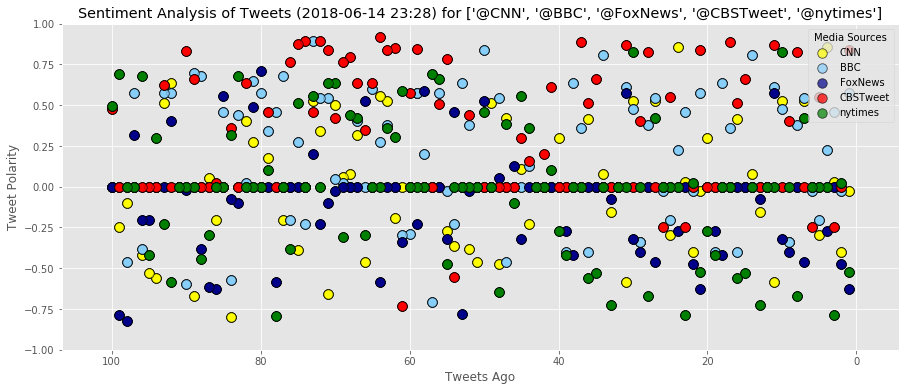

In [12]:
# individualize users
users = news_df['User'].unique()
colors = ['yellow', 'lightskyblue','darkblue','red','green']

# run loop for all sources
for i in range(len(users)):
    plt.scatter(x = news_df[news_df['User'] == users[i]]['Tweets Ago'].values,
                y = news_df[news_df['User'] == users[i]]['Compound'].values,
                s = 90,
                c = colors[i], 
                label = users[i],
                alpha = 0.7, 
                edgecolor = 'black',
                linewidth = 0.8)
    
# Define the labels, lim, title, location, param    
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_users}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(title = 'Media Sources', loc = 'upper right')
plt.grid(True)
plt.gcf().set_size_inches(15,6)
plt.rcParams['axes.facecolor'] = 'gainsboro'
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1,1)
plt.savefig('Tweets Chart.png')
plt.show()

In [13]:
sentiment_df = {'User': target_users, 'Average Score': all_sentiments}
sentiment_df = pd.DataFrame(sentiment_df)

sentiment_df

,Average Score,User
0,0.008097,@CNN
1,0.174705,@BBC
2,-0.079133,@FoxNews
3,0.282282,@CBSTweet
4,-0.004646,@nytimes


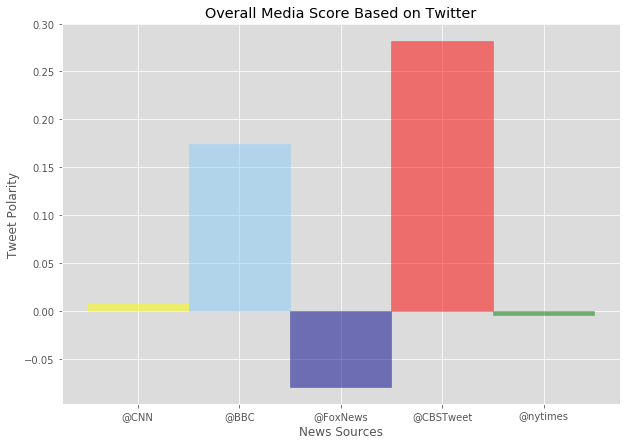

In [14]:
x = np.arange(len(sentiment_df))
y = sentiment_df['Average Score']
z = sentiment_df['User']

plt.figure(figsize = (10,7))

barlist = plt.bar(x, y, alpha = 0.5, align = 'center', width = 1)
plt.xticks(x,z, rotation = 'horizontal')

for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
    
    
plt.ylabel('Tweet Polarity')
plt.xlabel('News Sources')
plt.title('Overall Media Score Based on Twitter')
plt.savefig('Overall Media Score.png')

plt.show()